In [1]:
# Custom CSS
from IPython.core.display import HTML
css = '''
<style>
div.apphead {
    color: #000;
    font-size: large;
}

div.about {    
    background-color: #fee;
    padding: 1em;
    font-size: small;
}
</style>
'''
HTML(css)

<div class=apphead>
    <h1>Objective Assessment of University Discrimination</h1>
    <hr>
</div>

<p>Prof. P. A. Robinson, School of Physics, University of Sydney.</p>

<p>robinson@physics.usyd.edu.au</p>

In [2]:
%matplotlib widget
import ipywidgets as widgets
import pylab as pl
import numpy as np
import sciris as sc
import binomial_discrimination as bidisc

pl.rc('figure', dpi=75)

BiDisc(children=(VBox(children=(BoundedIntText(value=9, description='Total number of appointments:', style=Des…

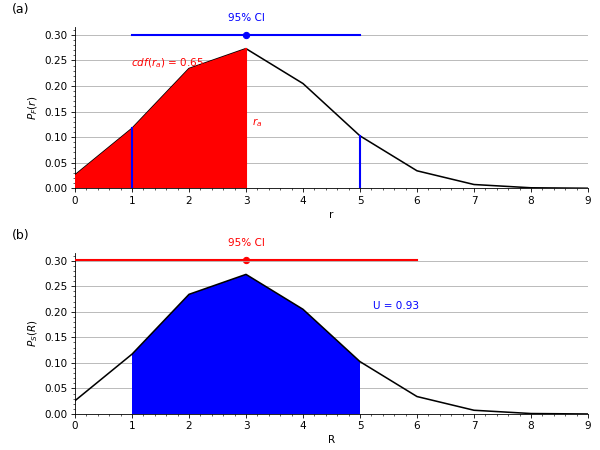

In [3]:
def make_box_layout():
     return widgets.Layout(
        border='solid 1px #ddd',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px'
     )
 
class BiDisc(widgets.HBox):
     
    def __init__(self):
        super().__init__()
        output = widgets.Output()

        self.d = sc.objdict()
        self.d.n = 9
        self.d.ra = 3
        self.d.rbar = 4
        self.fig = None
        self.ax = None
 
        with output:
            self.fig, _ = pl.subplots(num='Binomial Discrimination', figsize=(8, 6))
        self.plot()
         
        self.fig.canvas.toolbar_position = 'right'
 
        # define widgets
        style = {'description_width':'initial'}
        n_wid    = widgets.BoundedIntText(value=9, min=0, max=100, step=1, style=style, description='Total number of appointments:', disabled=False)
        ra_wid   = widgets.BoundedIntText(value=3, min=0, max=100, step=1, style=style, description='Actual appointments of a group:', disabled=False)
        rbar_wid = widgets.BoundedIntText(value=4, min=0, max=100, step=1, style=style, description='Expected number of appointments:', disabled=False)
        button = widgets.Button(description='Plot')
        controls = widgets.VBox([n_wid, ra_wid, rbar_wid, button])
        controls.layout = make_box_layout()
        out_box = widgets.Box([output])
        output.layout = make_box_layout()
 
        # observe stuff
        n_wid.observe(self.n_obs, 'value')
        ra_wid.observe(self.ra_obs, 'value')
        rbar_wid.observe(self.rbar_obs, 'value')
        button.observe(self.plot)
 
        # add to children
        self.children = [controls, output]
        
    def plot(self):
        if self.fig:
            self.fig.clf()
        self.fig = bidisc.binomial_discrimination(fig=self.fig, n=self.d.n, ra=self.d.ra, rbar=self.d.ra, interactive=False)
        return
     
    def n_obs(self, change):
        """ Update the smoothing """
        self.d.n = change.new
        self.plot()
        return
    
    def ra_obs(self, change):
        """ Update the smoothing """
        self.d.ra = change.new
        self.plot()
        return
 
    def rbar_obs(self, change):
        self.d.rbar = change.new
        self.plot()
        return
         
BiDisc()